<a href="https://colab.research.google.com/github/mashyko/object_detection/blob/master/Model_Quickload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorials Installation:
https://caffe2.ai/docs/tutorials.html

First download the tutorials source.

 from google.colab import drive

 drive.mount('/content/drive')

 %cd /content/drive/My Drive/

 !git clone --recursive https://github.com/caffe2/tutorials caffe2_tutorials



# Model Quickload

This notebook will show you how to quickly load a pretrained SqueezeNet model and test it on images of your choice in four main steps. 

1. Load the model
2. Format the input
3. Run the test
4. Process the results

The model used in this tutorial has been pretrained on the full 1000 class ImageNet dataset, and is downloaded from Caffe2's [Model Zoo](https://github.com/caffe2/caffe2/wiki/Model-Zoo). For an all around more in-depth tutorial on using pretrained models check out the [Loading Pretrained Models](https://github.com/caffe2/caffe2/blob/master/caffe2/python/tutorials/Loading_Pretrained_Models.ipynb) tutorial.  

Before this script will work, you need to download the model and install it. You can do this by running:

```
sudo python -m caffe2.python.models.download -i squeezenet
```

Or make a folder named `squeezenet`, download each file listed below to it, and place it in the `/caffe2/python/models/` directory:
* [predict_net.pb](https://download.caffe2.ai/models/squeezenet/predict_net.pb)
* [init_net.pb](https://download.caffe2.ai/models/squeezenet/init_net.pb)

Notice, the helper function *parseResults* will translate the integer class label of the top result to an English label by searching through the [inference codes file](inference_codes.txt). If you want to really test the model's capabilities, pick a code from the file, find an image representing that code, and test the model with it!

In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/caffe2_tutorials

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/caffe2_tutorials


In [0]:
!pip3 install torch torchvision

In [0]:
!python -m caffe2.python.models.download -i squeezenet

Writing to /usr/local/lib/python2.7/dist-packages/caffe2/python/models/squeezenet/predict_net.pb
[                                                                      ] 0%[######################################################################] 100%
Writing to /usr/local/lib/python2.7/dist-packages/caffe2/python/models/squeezenet/init_net.pb
[                                                                      ] 0%[                                                                      ] 0%[                                                                      ] 0%[                                                                      ] 0%[                                                                      ] 0%[                                                                      ] 0%[                                                                      ] 0%[                                                                      ] 0%[                                                       

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals
import numpy as np
import operator
# load up the caffe2 workspace
from caffe2.python import workspace
# choose your model here (use the downloader first)
from caffe2.python.models import squeezenet as mynet
# helper image processing functions
import helpers

##### Load the Model
# Load the pre-trained model
init_net = mynet.init_net
predict_net = mynet.predict_net

# Initialize the predictor with SqueezeNet's init_net and predict_net
p = workspace.Predictor(init_net, predict_net)

##### Select and format the input image
# use whatever image you want (urls work too)
# img = "https://upload.wikimedia.org/wikipedia/commons/a/ac/Pretzel.jpg"
# img = "images/cat.jpg"
# img = "images/cowboy-hat.jpg"
# img = "images/cell-tower.jpg"
# img = "images/Ducreux.jpg"
# img = "images/pretzel.jpg"
# img = "images/orangutan.jpg"
# img = "images/aircraft-carrier.jpg"
img = "images/flower.jpg"

# average mean to subtract from the image
mean = 128
# the size of images that the model was trained with
input_size = 227

# use the image helper to load the image and convert it to NCHW
img = helpers.loadToNCHW(img, mean, input_size)

##### Run the test
# submit the image to net and get a tensor of results
results = p.run({'data': img})  

##### Process the results
# Quick way to get the top-1 prediction result
# Squeeze out the unnecessary axis. This returns a 1-D array of length 1000
preds = np.squeeze(results)
# Get the prediction and the confidence by finding the maximum value and index of maximum value in preds array
curr_pred, curr_conf = max(enumerate(preds), key=operator.itemgetter(1))
print("Top-1 Prediction: {}".format(curr_pred))
print("Top-1 Confidence: {}\n".format(curr_conf))

# Lookup our result from the inference list
response = helpers.parseResults(results)
print(response)

/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python2.7/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Top-1 Prediction: 985
Top-1 Confidence: 0.982226848602

Raw top 3 results: [array([985.0, 0.9822268486022949], dtype=object), array([309.0, 0.01194374542683363], dtype=object), array([946.0, 0.004810206592082977], dtype=object)]
The image contains a daisy with a 98.22268486022949 percent probability.


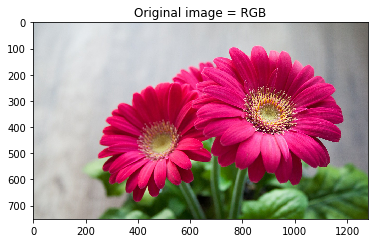

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('images/flower.jpg') #image to array


# show the original image
plt.figure()
plt.imshow(img)
plt.axis('on')
plt.title('Original image = RGB')
plt.show()

